In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip install requests pandas matplotlib seaborn

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import random
import matplotlib.font_manager as fm

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire



 예제 : Hacker News API - 기술 뉴스 트렌드 분석
 1단계: Hacker News 인기 기사 ID 수집
 인기 기사 500개 ID 수집 완료

 2단계: 상위 20개 기사 상세 정보 수집
  1. The New Skill in AI Is Not Prompting, It's Context Engineeri... (점수: 152)
  2. I write type-safe generic data structures in C... (점수: 178)
  3. The hidden JTAG in a Qualcomm/Snapdragon device’s USB port... (점수: 78)
  4. There are no new ideas in AI only new datasets... (점수: 229)
  5. The Original LZEXE (A.K.A. Kosinski) Compressor Source Code ... (점수: 21)
  6. End of an Era... (점수: 26)
  7. Show HN: TokenDagger – A tokenizer faster than OpenAI's Tikt... (점수: 228)
  8. They don't make 'em like that any more: Sony DTC-700 audio D... (점수: 57)
  9. Show HN: New Ensō – first public beta... (점수: 201)
 10. Creating fair dice from random objects... (점수: 9)
 11. The provenance memory model for C... (점수: 190)
 12. Xfinity using WiFi signals in your house to detect motion... (점수: 138)
 13. Entropy of a Mixture... (점수: 9)
 14. Jacobi Ellipsoid... (점수: 14)
 15. Ask HN: What Are Y

/tmp/ipython-input-2-1245516423.py:138: UserWarning: Glyph 333 (\N{LATIN SMALL LETTER O WITH MACRON}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 333 (\N{LATIN SMALL LETTER O WITH MACRON}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


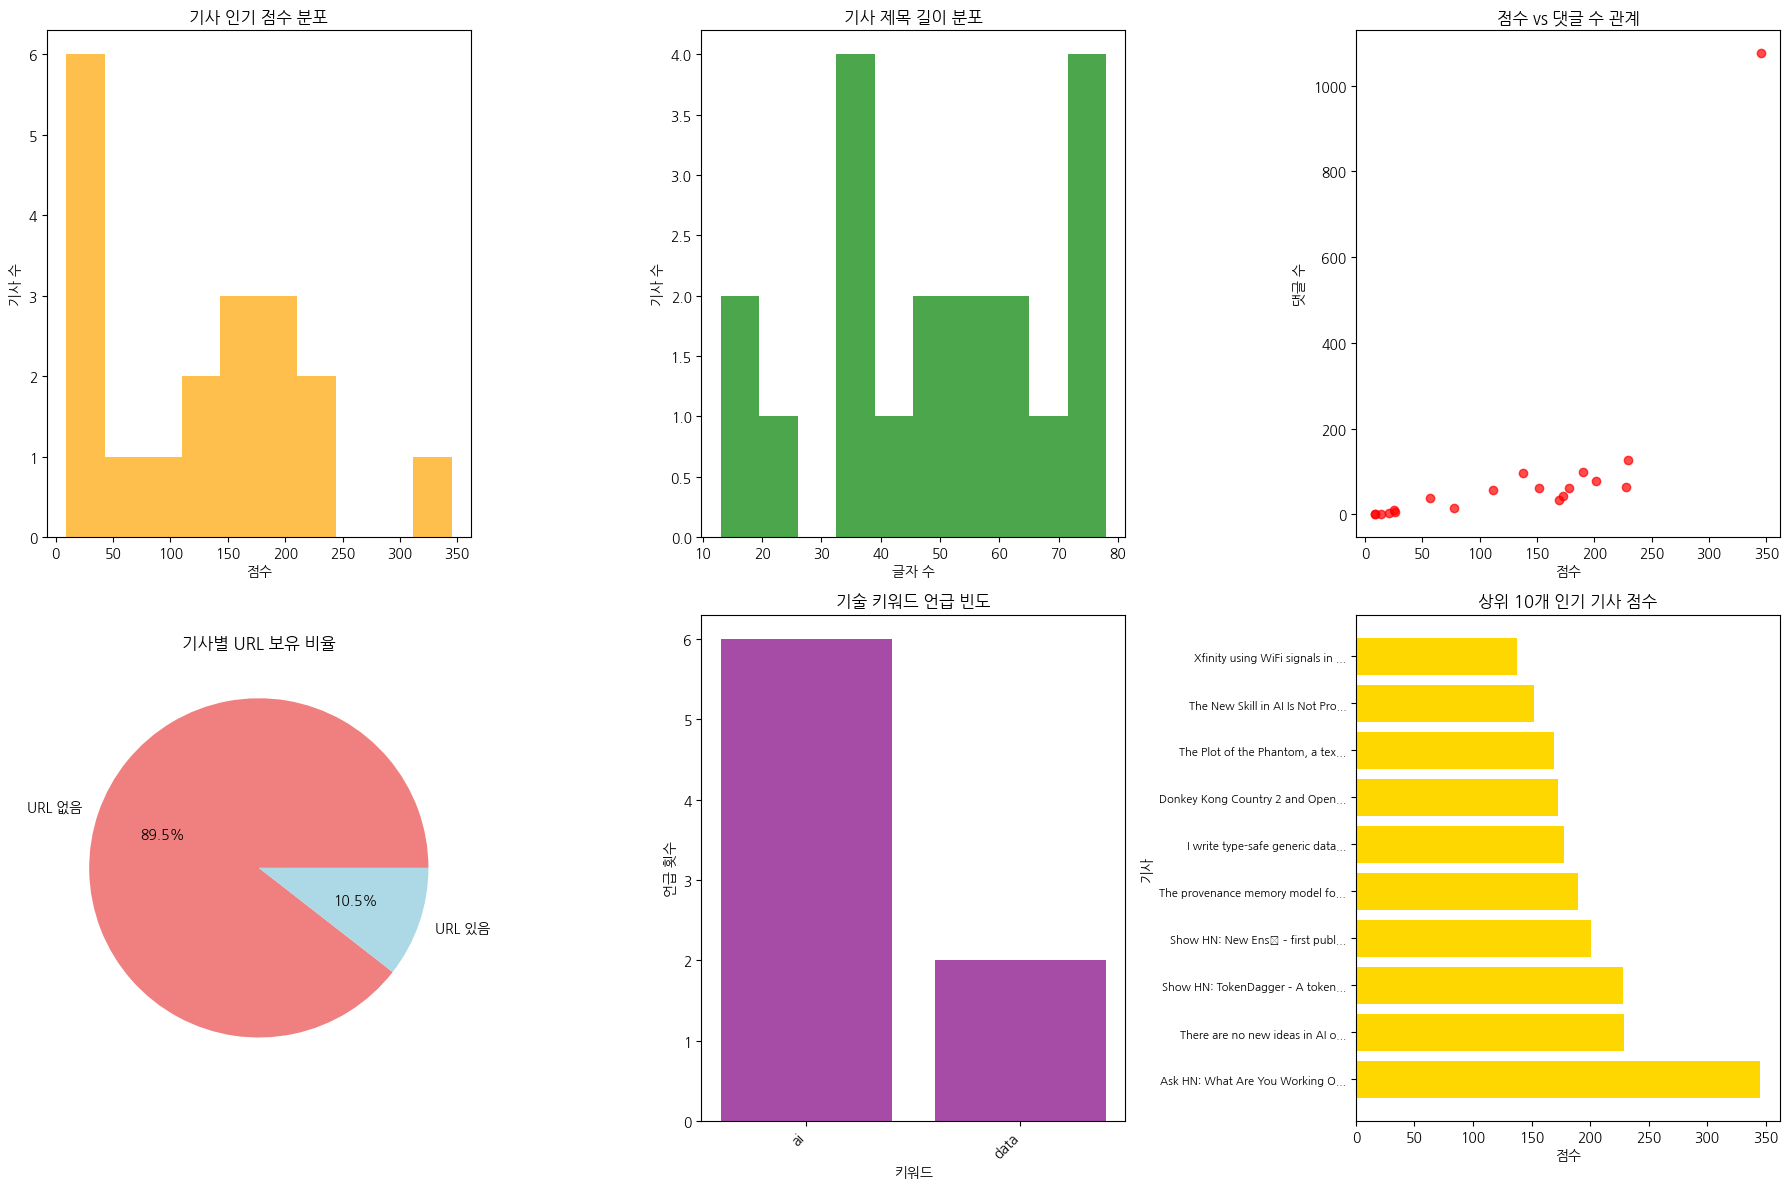


 Hacker News 분석 결과:
 분석한 기사 수: 19개
 평균 점수: 123.9점
 평균 댓글 수: 98.3개
 평균 제목 길이: 49.8글자
 URL 보유 기사: 17개 (89.5%)

 최고 인기 기사:
제목: Ask HN: What Are You Working On? (June 2025)
점수: 345점
댓글: 1075개
작성자: david927

 인기 기술 키워드 TOP 5:
1. Ai: 6회 언급
2. Data: 2회 언급

 분석한 최신 기사 TOP 5:
1. The New Skill in AI Is Not Prompting, It's Context Engineering... (점수: 152, 댓글: 62)
2. I write type-safe generic data structures in C... (점수: 178, 댓글: 61)
3. The hidden JTAG in a Qualcomm/Snapdragon device’s USB port... (점수: 78, 댓글: 14)
4. There are no new ideas in AI only new datasets... (점수: 229, 댓글: 126)
5. The Original LZEXE (A.K.A. Kosinski) Compressor Source Code Has Been Released... (점수: 21, 댓글: 3)


In [2]:
print("\n\n 예제 : Hacker News API - 기술 뉴스 트렌드 분석")
print("=" * 60)

def example_4_tech_news_analysis():
    """
    Hacker News의 인기 기술 뉴스를 분석하는 예제
    - 실시간 뉴스 데이터 수집
    - 텍스트 분석 및 키워드 추출
    - 시간대별 분석
    """

    print(" 1단계: Hacker News 인기 기사 ID 수집")

    try:
        # 인기 기사 ID 목록 가져오기
        top_stories_response = requests.get("https://hacker-news.firebaseio.com/v0/topstories.json")
        top_story_ids = top_stories_response.json()

        print(f" 인기 기사 {len(top_story_ids)}개 ID 수집 완료")

        print(f"\n 2단계: 상위 20개 기사 상세 정보 수집")

        articles = []

        # 상위 20개 기사만 분석 (API 호출 제한)
        for i, story_id in enumerate(top_story_ids[:20]):
            try:
                # 각 기사의 상세 정보 가져오기
                story_response = requests.get(f"https://hacker-news.firebaseio.com/v0/item/{story_id}.json")
                story_data = story_response.json()

                if story_data and story_data.get('type') == 'story':
                    article_info = {
                        'id': story_data.get('id'),
                        'title': story_data.get('title', ''),
                        'url': story_data.get('url', ''),
                        'score': story_data.get('score', 0),
                        'by': story_data.get('by', 'Unknown'),
                        'time': story_data.get('time', 0),
                        'descendants': story_data.get('descendants', 0),  # 댓글 수
                        'title_length': len(story_data.get('title', '')),
                        'has_url': bool(story_data.get('url'))
                    }

                    # 시간 변환
                    if article_info['time']:
                        article_info['datetime'] = datetime.fromtimestamp(article_info['time'])
                        article_info['hour'] = article_info['datetime'].hour
                        article_info['day_of_week'] = article_info['datetime'].weekday()
                    else:
                        article_info['datetime'] = None
                        article_info['hour'] = None
                        article_info['day_of_week'] = None

                    articles.append(article_info)
                    print(f" {i+1:2d}. {article_info['title'][:60]}... (점수: {article_info['score']})")

                time.sleep(0.1)  # API 부하 방지

            except Exception as e:
                print(f" 기사 {story_id} 처리 오류: {e}")
                continue

        if not articles:
            print(" 기사 데이터를 가져올 수 없습니다.")
            return None

        articles_df = pd.DataFrame(articles)

        print(f"\n 3단계: 기술 뉴스 데이터 분석")

        # 키워드 분석을 위한 간단한 텍스트 처리
        all_titles = ' '.join(articles_df['title'].str.lower())

        # 기술 관련 키워드 카운트
        tech_keywords = ['ai', 'python', 'javascript', 'react', 'machine learning', 'blockchain',
                        'kubernetes', 'docker', 'aws', 'google', 'microsoft', 'apple', 'tesla',
                        'startup', 'crypto', 'security', 'privacy', 'data', 'cloud', 'api']

        keyword_counts = {}
        for keyword in tech_keywords:
            count = all_titles.count(keyword.lower())
            if count > 0:
                keyword_counts[keyword] = count

        # 시각화
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))

        # 1. 인기 점수 분포
        axes[0, 0].hist(articles_df['score'], bins=10, color='orange', alpha=0.7)
        axes[0, 0].set_title('기사 인기 점수 분포')
        axes[0, 0].set_xlabel('점수')
        axes[0, 0].set_ylabel('기사 수')

        # 2. 제목 길이 분포
        axes[0, 1].hist(articles_df['title_length'], bins=10, color='green', alpha=0.7)
        axes[0, 1].set_title('기사 제목 길이 분포')
        axes[0, 1].set_xlabel('글자 수')
        axes[0, 1].set_ylabel('기사 수')

        # 3. 댓글 수 vs 점수 관계
        axes[0, 2].scatter(articles_df['score'], articles_df['descendants'], alpha=0.7, color='red')
        axes[0, 2].set_title('점수 vs 댓글 수 관계')
        axes[0, 2].set_xlabel('점수')
        axes[0, 2].set_ylabel('댓글 수')

        # 4. URL 보유 비율
        url_counts = articles_df['has_url'].value_counts()
        axes[1, 0].pie(url_counts.values,
                      labels=['URL 없음', 'URL 있음'],
                      autopct='%1.1f%%',
                      colors=['lightcoral', 'lightblue'])
        axes[1, 0].set_title('기사별 URL 보유 비율')

        # 5. 기술 키워드 빈도 (상위 10개)
        if keyword_counts:
            sorted_keywords = dict(sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)[:10])
            axes[1, 1].bar(range(len(sorted_keywords)), list(sorted_keywords.values()), color='purple', alpha=0.7)
            axes[1, 1].set_title('기술 키워드 언급 빈도')
            axes[1, 1].set_xlabel('키워드')
            axes[1, 1].set_ylabel('언급 횟수')
            axes[1, 1].set_xticks(range(len(sorted_keywords)))
            axes[1, 1].set_xticklabels(list(sorted_keywords.keys()), rotation=45, ha='right')
        else:
            axes[1, 1].text(0.5, 0.5, '키워드 데이터 없음', ha='center', va='center', transform=axes[1, 1].transAxes)
            axes[1, 1].set_title('기술 키워드 언급 빈도')

        # 6. 상위 점수 기사들
        top_articles = articles_df.nlargest(10, 'score')
        axes[1, 2].barh(range(len(top_articles)), top_articles['score'], color='gold')
        axes[1, 2].set_title('상위 10개 인기 기사 점수')
        axes[1, 2].set_xlabel('점수')
        axes[1, 2].set_ylabel('기사')
        axes[1, 2].set_yticks(range(len(top_articles)))
        axes[1, 2].set_yticklabels([title[:30] + '...' if len(title) > 30 else title
                                   for title in top_articles['title']], fontsize=8)

        plt.tight_layout()
        plt.show()

        print(f"\n Hacker News 분석 결과:")
        print(f" 분석한 기사 수: {len(articles_df)}개")
        print(f" 평균 점수: {articles_df['score'].mean():.1f}점")
        print(f" 평균 댓글 수: {articles_df['descendants'].mean():.1f}개")
        print(f" 평균 제목 길이: {articles_df['title_length'].mean():.1f}글자")
        print(f" URL 보유 기사: {articles_df['has_url'].sum()}개 ({articles_df['has_url'].mean()*100:.1f}%)")

        # 최고 인기 기사
        top_article = articles_df.loc[articles_df['score'].idxmax()]
        print(f"\n 최고 인기 기사:")
        print(f"제목: {top_article['title']}")
        print(f"점수: {top_article['score']}점")
        print(f"댓글: {top_article['descendants']}개")
        print(f"작성자: {top_article['by']}")

        # 키워드 분석 결과
        if keyword_counts:
            print(f"\n 인기 기술 키워드 TOP 5:")
            sorted_kw = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)[:5]
            for i, (keyword, count) in enumerate(sorted_kw, 1):
                print(f"{i}. {keyword.title()}: {count}회 언급")

        # 최신 기사 5개 출력
        print(f"\n 분석한 최신 기사 TOP 5:")
        for i, row in articles_df.head(5).iterrows():
            print(f"{i+1}. {row['title'][:80]}... (점수: {row['score']}, 댓글: {row['descendants']})")

        return articles_df

    except Exception as e:
        print(f" Hacker News 데이터 수집 오류: {e}")
        return None

# 예제  실행
articles_df = example_4_tech_news_analysis()